# Accelerated gradient for strongly convex objective

This notebook provides the code for drawing worst-case performance of an accelerated gradient method, and comparing it to its theoretical guarantee. This code returns the figures from the paper [...].

More precisely, the following convex minimization problem is considered
\begin{equation}
f_\star \triangleq \min_x f(x),
\end{equation}
where $f$ is $L$-smooth and $\mu$-strongly convex.

The package PEPit allows to compute a worst-case guarantee for the **accelerated gradient** method a.k.a **fast gradient** method. That is, it computes the smallest possible $\tau(n, L, \mu)$ such that the following guarantee holds
\begin{equation}
f(x_n) - f_\star \leqslant \tau(n, L, \mu) \left(F(x_0) - F_\star + \frac{\mu}{2}\| x_0 - x_\star\|^2_2\right),
\end{equation}
where $x_n$ is the output of the accelerated gradient method, and where $x_\star$ is the minimizer of $f$.

#### Algorithm

The accelerated gradient method may be described as follows, for $t \in \{0,1, \ldots, n-1\}$
\begin{equation}
\begin{aligned}
        x_{t+1} & = y_t - \alpha \nabla F(y_t),\\
        y_{t+1} & = x_{t+1} + \beta (x_{t+1} - x_{t}),
    \end{aligned}
\end{equation}
with $\kappa = \frac{\mu}{L}$, $\alpha = \frac{1}{L}$ and $\beta = \frac{1 - \sqrt{\kappa}}{1 + \sqrt{\kappa}}$.

#### Theoretical guarantee

A following **upper** theoretical guarantee is 
\begin{equation}
F(x_n) - F_\star \leqslant \tau(n, L, \mu) \left(F(x_0) -  F(x_\star) + \frac{\mu}{2}\|x_0 - x_\star\|^2_2\right).
\end{equation}

## Imports

First, we include the right python imports, including commmon packages and the function returning worst-case performance of the accelerated gradient method.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import PEPit

# import from the toolbox the accelerated gradient method in the strongly convex setting
import PEPit.examples.unconstrained_convex_minimization.accelerated_gradient_strongly_convex as instrFGM


# Set the verbose parameter to False to return worst-case without details
verbose = False

## Worst-case as a function of the iteration count

In [5]:
# Set the parameters

L = 1          # smoothness parameter
mu = 0.1       # strong-convexity parameter
gamma = 1 / L  # step size

# Set a list of iteration counter to test
ns = np.array([1, 2, 4, 6, 8, 10, 15])#, 20, 30, 40, 50])


# Compute worst-case and theoretical guarantee for each iteration count
pepit_taus = np.zeros(len(ns))
theoretical_taus = np.zeros(len(ns))
for i in range(len(ns)):
    pepit_taus[i], theoretical_taus[i] = instrFGM.wc_accelerated_gradient_strongly_convex(mu=mu, 
                                                                                          L=L, 
                                                                                          n=ns[i], 
                                                                                          verbose=verbose)


## Plot

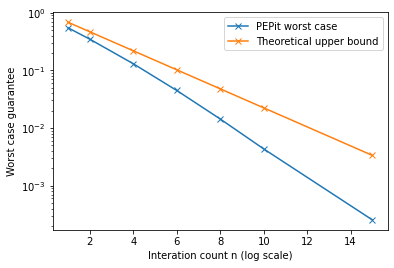

In [7]:
# Plot theoretical and PEPit worst-case performance as a function of the iteration count
plt.plot(ns, pepit_taus, label='PEPit worst case', marker='x')
plt.plot(ns, theoretical_taus, label='Theoretical upper bound', marker='x')

plt.semilogy()
plt.legend()
plt.xlabel('Interation count n (log scale)')
plt.ylabel('Worst case guarantee')

plt.show()